In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Global YouTube Statistics dataset
df = pd.read_csv("Global YouTube Statistics.csv", encoding='unicode_escape')

In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [ ]:
# Replace null values with the mean of each column and store it back in the same variable
df.fillna(df.mean(), inplace=True)

<ipython-input-5-0fdf2a32b93e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.shape

(995, 28)

In [ ]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title', 'uploads', 'Country', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

Categorical Columns:
['created_month']


In [ ]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

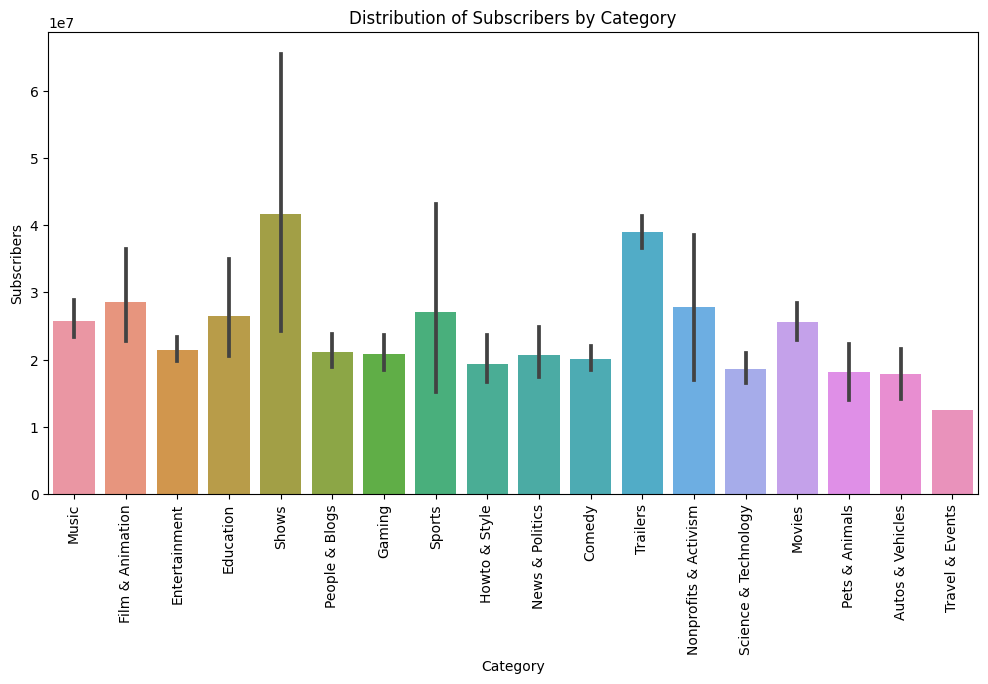

In [ ]:
#Distribution of Subscribers by Category (Bar Plot):
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='subscribers', data=df)
plt.title('Distribution of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

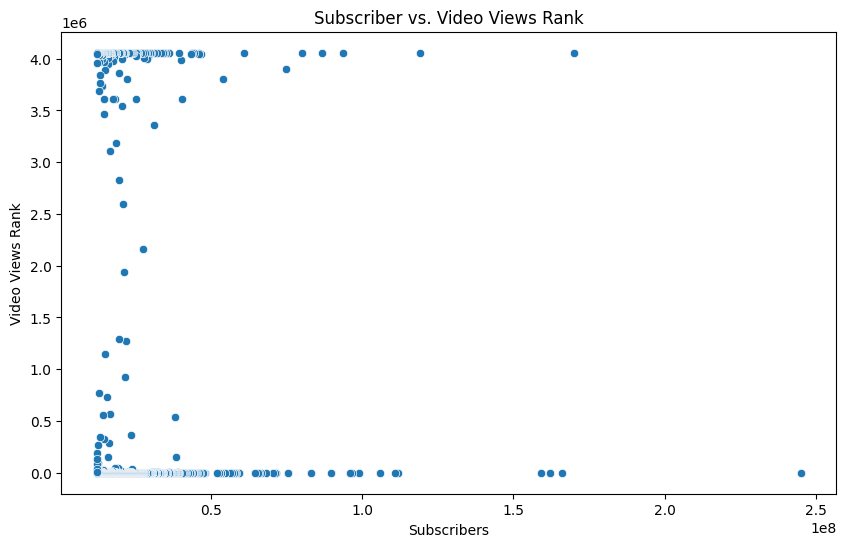

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video_views_rank', data=df)
plt.title('Subscriber vs. Video Views Rank')
plt.xlabel('Subscribers')
plt.ylabel('Video Views Rank')
plt.show()

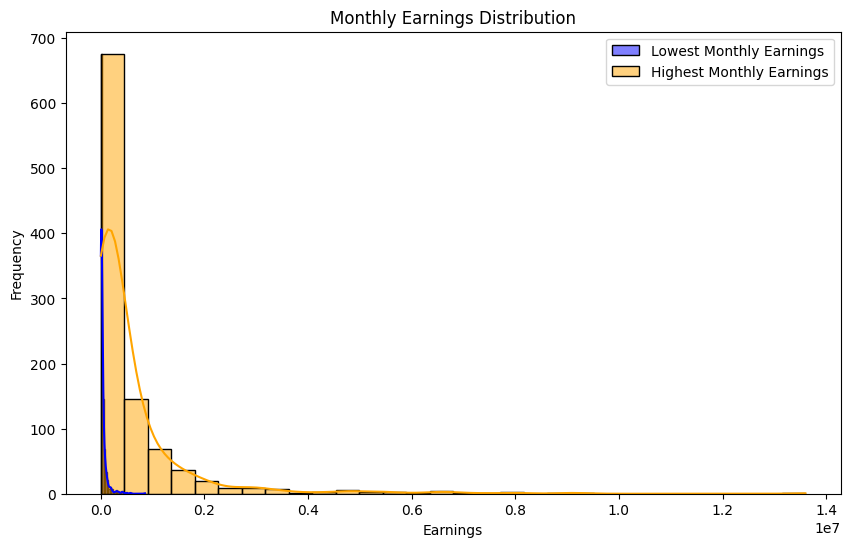

In [ ]:
# Monthly Earning Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['lowest_monthly_earnings'], bins=30, kde=True, label='Lowest Monthly Earnings', color='blue')
sns.histplot(df['highest_monthly_earnings'], bins=30, kde=True, label='Highest Monthly Earnings', color='orange')
plt.title('Monthly Earnings Distribution')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

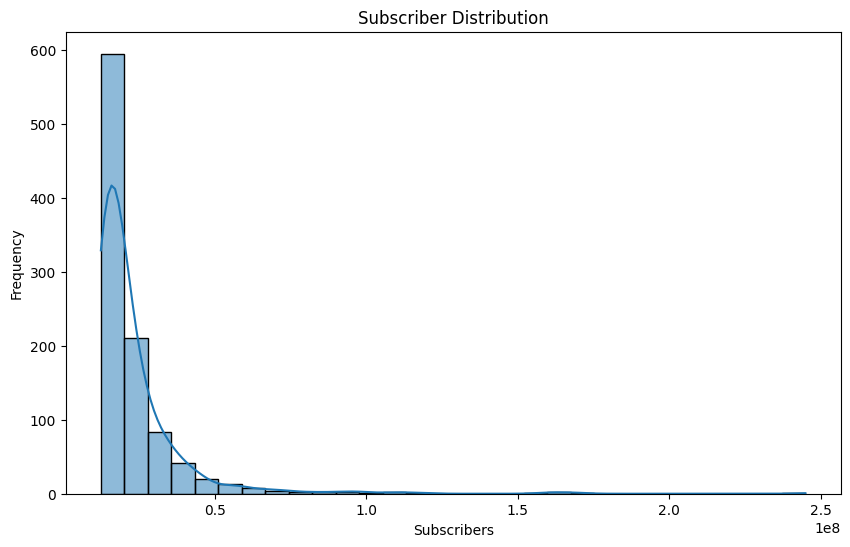

In [ ]:
# Susbcibers count distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['subscribers'], bins=30, kde=True)
plt.title('Subscriber Distribution')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

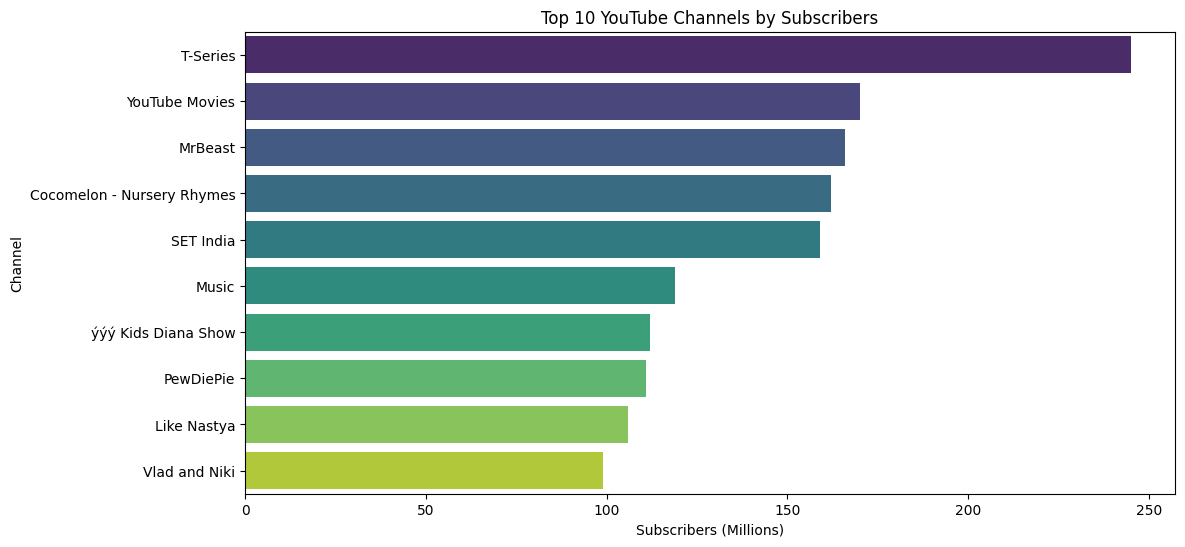

In [ ]:
# Sort the DataFrame by subscribers in descending order and select the top 10 channels
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)

# Convert subscriber counts to millions
top_10_channels['subscribers_millions'] = top_10_channels['subscribers'] / 1e6

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers_millions', y='Youtuber', data=top_10_channels, palette='viridis')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers (Millions)')
plt.ylabel('Channel')
plt.show()

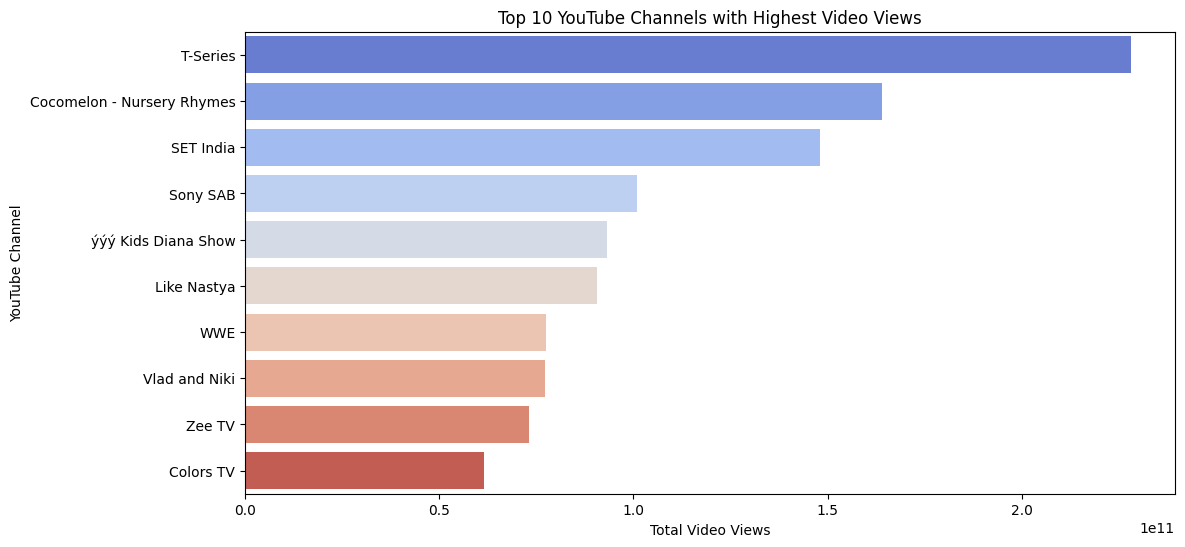

In [ ]:
# Top 10 Youtube Channel with the highest video views
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 channels with the highest video views
top_10_video_views = df.nlargest(10, 'video views')

# Create a bar plot with a different color palette ('coolwarm')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_video_views, x='video views', y='Youtuber', palette='coolwarm')
plt.title('Top 10 YouTube Channels with Highest Video Views')
plt.xlabel('Total Video Views')
plt.ylabel('YouTube Channel')

# Show the plot
plt.show()

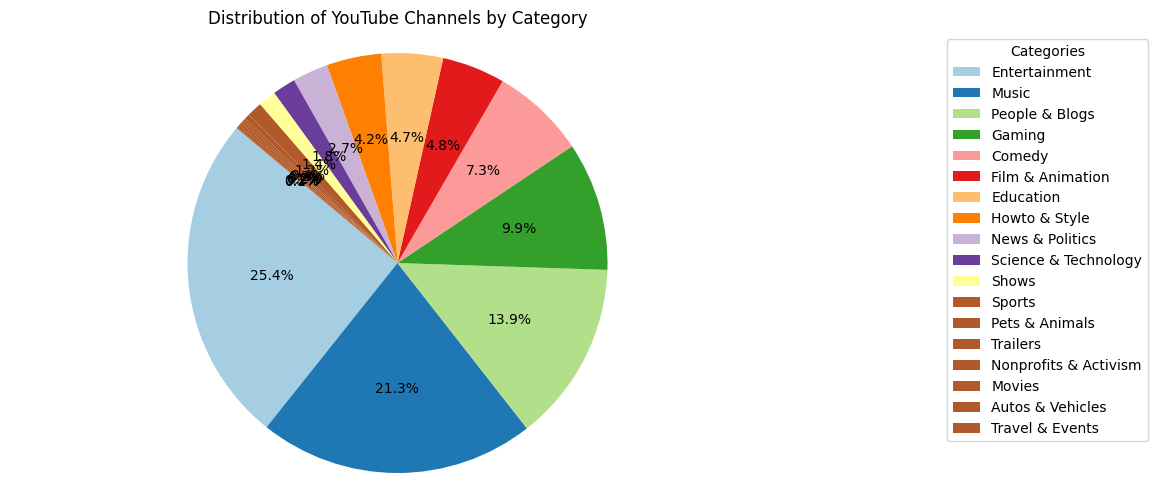

In [ ]:
# Pie-chart to show the distribution of Youtube Channels by Category
import matplotlib.pyplot as plt

# Group channels by category and count the number of channels in each category
category_counts = df['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(category_counts)))  # Use a color map for better distinction

# Create the pie chart with labels and percentages
plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend for better readability and space it apart from the pie chart
plt.legend(category_counts.index, title='Categories', bbox_to_anchor=(1.2, 1), loc='upper left')

plt.title('Distribution of YouTube Channels by Category')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()


<ipython-input-17-4c1b7807a975>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


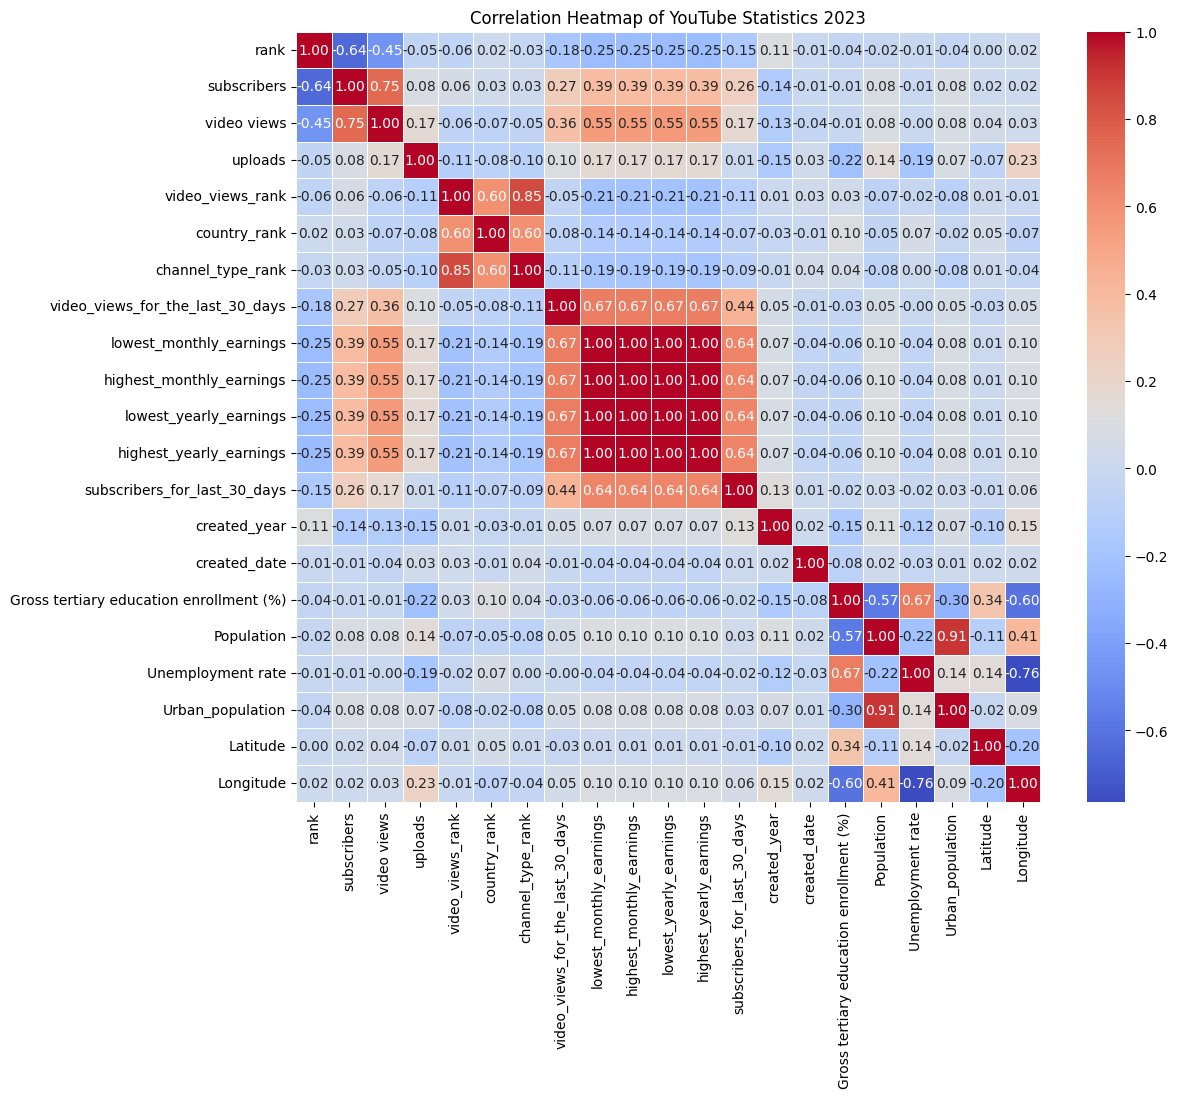

In [ ]:
# Correlation Heatmap of YouTube Statistics 2023
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of YouTube Statistics 2023')

# Show the heatmap
plt.show()


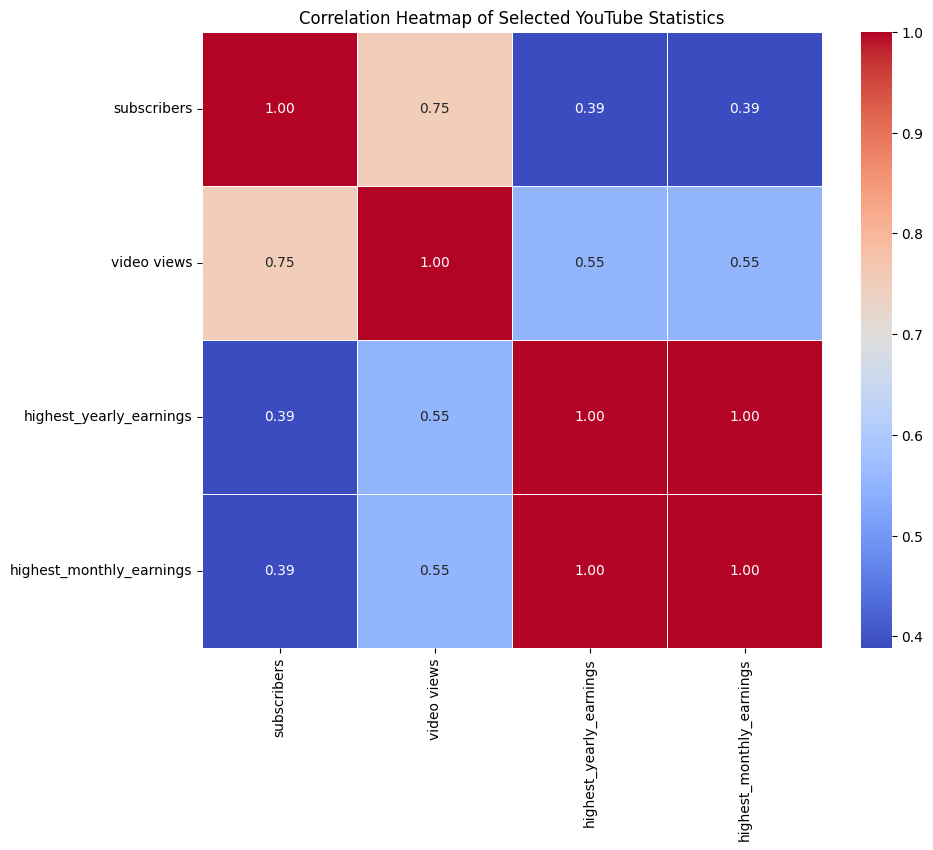

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the 4-5 best features
selected_features = ['subscribers', 'video views', 'highest_yearly_earnings', 'highest_monthly_earnings']

# Calculate the correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected YouTube Statistics')

# Show the heatmap
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# This is the target varibale for regression model
target_col='subscribers'

## Encode categorical variables

In [ ]:
# Encode categorical variables
# List of categorical columns to be label encoded
cat_cols = ['Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## Scale the numerical variables

In [ ]:
# Standardize the numerical variables
num_cols =           ['video views', 'uploads', 'video_views_rank',
                     'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
                     'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                     'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year',
                     'created_month', 'Gross tertiary education enrollment (%)', 'Population',
                     'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

scaler = StandardScaler()
# Apply standardization to each of the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Perform statistical test for feature selection

In [ ]:
from scipy.stats import ttest_ind
# Split the data into two groups (e.g., high subscribers and low subscribers)
high_subscribers = df[df[target_col] > df[target_col].median()]
low_subscribers = df[df[target_col] < df[target_col].median()]

# Initialize an empty dictionary to store t-test results for each feature
t_test_results = {}

# Perform t-test for each numerical feature
for feature in numerical_columns:
    t_stat, p_value = ttest_ind(high_subscribers[feature], low_subscribers[feature])
    t_test_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}

# Print the t-test results
for feature, result in t_test_results.items():
    print(f"T-test for {feature}:")
    print(f"t-statistic: {result['t-statistic']}")
    print(f"P-value: {result['p-value']}")
    print(f"{'-'*20}")

T-test for rank:
t-statistic: -55.40458831206171
P-value: 1.2619854004765595e-304
--------------------
T-test for Youtuber:
t-statistic: 0.6656144725834372
P-value: 0.5058137034806902
--------------------
T-test for subscribers:
t-statistic: 17.21422530009321
P-value: 3.0192190592439423e-58
--------------------
T-test for video views:
t-statistic: 11.278409318200987
P-value: 7.898272126081089e-28
--------------------
T-test for category:
t-statistic: 0.38422767925819995
P-value: 0.7008928041639343
--------------------
T-test for Title:
t-statistic: 1.2127028096201857
P-value: 0.22553482247349727
--------------------
T-test for uploads:
t-statistic: -0.35689537582624703
P-value: 0.721246729212077
--------------------
T-test for Country:
t-statistic: 2.359752101699625
P-value: 0.01848179415019382
--------------------
T-test for Abbreviation:
t-statistic: 2.392434921972798
P-value: 0.016923937359142473
--------------------
T-test for channel_type:
t-statistic: -0.4584479959302637
P-value:

##Extract feature names and p-values

In [ ]:
# Extract feature names and p-values
feature_p_values = [(feature, result['p-value']) for feature, result in t_test_results.items()]

# Sort the features based on p-values in ascending order
sorted_features = sorted(feature_p_values, key=lambda x: x[1])

# Print the top 6 features
top_features = sorted_features[:6]
for feature, p_value in top_features:
    print(f"{feature}: P-value = {p_value}")

rank: P-value = 1.2619854004765595e-304
subscribers: P-value = 3.0192190592439423e-58
video views: P-value = 7.898272126081089e-28
lowest_yearly_earnings: P-value = 6.831858192694286e-13
highest_yearly_earnings: P-value = 7.33909264031463e-13
lowest_monthly_earnings: P-value = 7.362707366528279e-13


## Define the X and y variable for the model training

In [ ]:
# Define the target variable
y = df['subscribers'] # This is the target variable for regression model

# Select the features based on the t-test results
selected_features = ['rank', 'video views', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']

# Create the feature matrix X with the selected features
X = df[selected_features]

In [ ]:
df[selected_features]

,rank,video views,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,-1.730311,15.383174,7.347462,7.325663,7.385997,7.347167
1,-1.726829,-0.782738,-0.513573,-0.513750,-0.513785,-0.513543
2,-1.723348,1.228702,4.178543,4.189898,4.133146,4.178227
3,-1.719866,10.845374,6.361700,6.367513,6.340438,6.360952
4,-1.716385,9.710924,5.834011,5.844885,5.875745,5.831587
...,...,...,...,...,...,...
990,1.716385,-0.142510,1.409220,1.402551,1.461161,1.408125
991,1.719866,-0.664017,-0.288017,-0.288236,-0.288176,-0.288744
992,1.723348,-0.625710,-0.513336,-0.513516,-0.513551,-0.513311
993,1.726829,-0.756211,-0.500095,-0.500248,-0.500309,-0.500070


## Import Regressor libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Perfrom train-test split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Create a linear regression model

In [ ]:
# Create a linear regression model
linear_regression = LinearRegression()
# Train the model on the training set
linear_regression.fit(X_train, y_train)
# Make predictions on the test set
y_pred_linear_regression = linear_regression.predict(X_test)

## Compute and print evaluation metrics for linear regression model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Compute and print evaluation metrics for each model
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear_regression))
print("MSE:", mean_squared_error(y_test, y_pred_linear_regression))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear_regression)))
print("R^2:", r2_score(y_test, y_pred_linear_regression))
print()

Linear Regression Metrics:
MAE: 0.2731080455896903
MSE: 0.15935181282663213
RMSE: 0.3991889437680259
R^2: 0.6327954074970112



## Create a K Nearest Neighbour regression model

In [ ]:
# Create a knn regression model
knn_regression = KNeighborsRegressor()
# Train the model on the training set
knn_regression.fit(X_train, y_train)
# Make predictions on the test set
y_pred_knn_regression = knn_regression.predict(X_test)

##Compute and print evaluation metrics for k-nn regression model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Compute and print evaluation metrics for each model
print("KNN Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn_regression))
print("MSE:", mean_squared_error(y_test, y_pred_knn_regression))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn_regression)))
print("R^2:", r2_score(y_test, y_pred_knn_regression))
print()

KNN Regression Metrics:
MAE: 0.10931335336284904
MSE: 0.09763954880628914
RMSE: 0.3124732769474682
R^2: 0.7750029315913942



## Create a Decision Tree Regression Model

In [ ]:
# Create a dt regression model
dt_regression = DecisionTreeRegressor()
# Train the model on the training set
dt_regression.fit(X_train, y_train)
# Make predictions on the test set
y_pred_dt_regression = dt_regression.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Compute and print evaluation metrics for each model
print("DT Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt_regression))
print("MSE:", mean_squared_error(y_test, y_pred_dt_regression))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_regression)))
print("R^2:", r2_score(y_test, y_pred_dt_regression))
print()

DT Regression Metrics:
MAE: 0.006741363050508995
MSE: 0.0005995322000522891
RMSE: 0.024485346639414544
R^2: 0.9986184595373752



## Use GridSearchCV for HyperParamter Tuning and K-fold Cross Validation to get the best fit Linear Regression Model


In [ ]:
from sklearn.model_selection import GridSearchCV
# Linear Regression
linreg = LinearRegression()

# Define the hyperparameter grid
linreg_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, 2, 4, 8]
}

# Perform GridSearchCV to find the best hyperparameters
linreg_grid = GridSearchCV(linreg, linreg_param_grid, cv=5, scoring='neg_mean_squared_error')
linreg_grid.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Linear Regression: ", linreg_grid.best_params_)

Linear Regression:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}


## Use GridSearchCV for HyperParamter Tuning and K-fold Cross Validation to get the best fit K Nearest Neighbour Model


In [ ]:
# K-NN Regression
knnreg = KNeighborsRegressor()

# Define the hyperparameter grid
knnreg_param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best hyperparameters
knnreg_grid = GridSearchCV(knnreg, knnreg_param_grid, cv=5, scoring='neg_mean_squared_error')
knnreg_grid.fit(X_train, y_train)

print("K-NN Regression: ", knnreg_grid.best_params_)

K-NN Regression:  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


## Use GridSearchCV for HyperParamter Tuning and K-fold Cross Validation to get the best fit Decision Tree Regressor Model

In [ ]:
# Decision Tree Regression
dtreg = DecisionTreeRegressor()

# Define the hyperparameter grid
dtreg_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
dtreg_grid = GridSearchCV(dtreg, dtreg_param_grid, cv=5, scoring='neg_mean_squared_error')
dtreg_grid.fit(X_train, y_train)

print("Decision Tree Regression: ", dtreg_grid.best_params_)

Decision Tree Regression:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Use GridSearchCV for HyperParamter Tuning and K-fold Cross Validation to get the best fit Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge()

# Define the hyperparameter grid
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform GridSearchCV to find the best hyperparameters
ridge_grid = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Print the best hyperparameters for Ridge Regression
print("Ridge Regression: ", ridge_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Ridge Regression:  {'alpha': 0.1, 'fit_intercept': True, 'solver': 'sparse_cg'}


## Define the regression models with the best hyperparameters

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the regression models with the best hyperparameters
linreg_params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
knnreg_params = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
dtreg_params =  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
ridge_params=   {'alpha': 0.1, 'fit_intercept': True, 'solver': 'sparse_cg'}
# Instantiate each model with its corresponding hyperparameters
linreg = LinearRegression(**linreg_params)
knnreg = KNeighborsRegressor(**knnreg_params)
dtreg = DecisionTreeRegressor(**dtreg_params)
ridge= Ridge(**ridge_params)

# Perform k-fold cross-validation on the training set

In [ ]:
# Perform k-fold cross-validation on the training set
linreg_scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
knnreg_scores = cross_val_score(knnreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dtreg_scores = cross_val_score(dtreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Print the mean RMSE scores for each model
print("Linear Regression Mean RMSE: ", np.sqrt(-linreg_scores.mean()))
print("K-NN Regression Mean RMSE: ", np.sqrt(-knnreg_scores.mean()))
print("Decision Tree Regression Mean RMSE: ", np.sqrt(-dtreg_scores.mean()))
print("Ridge Regression Mean RMSE: ", np.sqrt(-ridge_scores.mean()))

Linear Regression Mean RMSE:  0.6155720408369191
K-NN Regression Mean RMSE:  0.5079046662369684
Decision Tree Regression Mean RMSE:  0.24176755726092936
Ridge Regression Mean RMSE:  0.614236042514813


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Fit the regression models on the training set
linreg.fit(X_train, y_train)
knnreg.fit(X_train, y_train)
dtreg.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, solver='sparse_cg')

In [ ]:
# Predict on the test set
y_pred_linreg = linreg.predict(X_test)
y_pred_knnreg = knnreg.predict(X_test)
y_pred_dtreg = dtreg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

## Compute and print evaluation metrics for each model

In [ ]:
# Compute and print evaluation metrics for each model
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_linreg))
print("MSE:", mean_squared_error(y_test, y_pred_linreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print("R^2:", r2_score(y_test, y_pred_linreg))
print()

Linear Regression Metrics:
MAE: 0.2731080455896903
MSE: 0.15935181282663213
RMSE: 0.3991889437680259
R^2: 0.6327954074970112



In [ ]:
print("K-NN Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_knnreg))
print("MSE:", mean_squared_error(y_test, y_pred_knnreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knnreg)))
print("R^2:", r2_score(y_test, y_pred_knnreg))
print()

K-NN Regression Metrics:
MAE: 0.08108060575103584
MSE: 0.05946792527127637
RMSE: 0.24386046270618852
R^2: 0.862964249487423



In [ ]:
print("Decision Tree Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dtreg))
print("MSE:", mean_squared_error(y_test, y_pred_dtreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dtreg)))
print("R^2:", r2_score(y_test, y_pred_dtreg))

Decision Tree Regression Metrics:
MAE: 0.008644517458202832
MSE: 0.0008892023159094007
RMSE: 0.029819495567655077
R^2: 0.997950954129267


In [ ]:
print("Ridge Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R^2:", r2_score(y_test, y_pred_ridge))

Ridge Regression Metrics:
MAE: 0.2702074754780809
MSE: 0.15619673147627694
RMSE: 0.39521732183227615
R^2: 0.6400658636093081


## Create a dataframe to store values of all the evaluation metrics of the models

In [ ]:
import pandas as pd

# Define the evaluation metrics for each model
linear_reg_metrics = [mean_absolute_error(y_test, y_pred_linreg),
                      mean_squared_error(y_test, y_pred_linreg),
                      np.sqrt(mean_squared_error(y_test, y_pred_linreg)),
                      r2_score(y_test, y_pred_linreg)]

knn_reg_metrics = [mean_absolute_error(y_test, y_pred_knnreg),
                   mean_squared_error(y_test, y_pred_knnreg),
                   np.sqrt(mean_squared_error(y_test, y_pred_knnreg)),
                   r2_score(y_test, y_pred_knnreg)]

dt_reg_metrics = [mean_absolute_error(y_test, y_pred_dtreg),
                  mean_squared_error(y_test, y_pred_dtreg),
                  np.sqrt(mean_squared_error(y_test, y_pred_dtreg)),
                  r2_score(y_test, y_pred_dtreg)]

ridge_metrics = [mean_absolute_error(y_test, y_pred_ridge),
                  mean_squared_error(y_test, y_pred_ridge),
                  np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
                  r2_score(y_test, y_pred_ridge)]

# Create a table of the evaluation metrics for each model
table_data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R^2'],
              'Linear Regression': linear_reg_metrics,
              'K-NN Regression': knn_reg_metrics,
              'Decision Tree Regression': dt_reg_metrics,
              'Ridge Regression': ridge_metrics}


df_metrics = pd.DataFrame(table_data)
df_metrics

,Metrics,Linear Regression,K-NN Regression,Decision Tree Regression,Ridge Regression
0,MAE,0.273108,0.081081,0.008645,0.270207
1,MSE,0.159352,0.059468,0.000889,0.156197
2,RMSE,0.399189,0.243860,0.029819,0.395217
3,R^2,0.632795,0.862964,0.997951,0.640066


In [ ]:
# Find the best model based on MAE and R-squared
best_model_mae = df_metrics.iloc[:, 1:].idxmin(axis=1)[0]
best_model_r2 = df_metrics.iloc[:, 1:].idxmax(axis=1)[3]

print(f"The best model based on MAE is: {best_model_mae}")
print(f"The best model based on R-squared is: {best_model_r2}")

The best model based on MAE is: Decision Tree Regression
The best model based on R-squared is: Decision Tree Regression


## Decision Tree Regressor is the best fit model with the highest R2 score and lowest Root Mean Squared Error

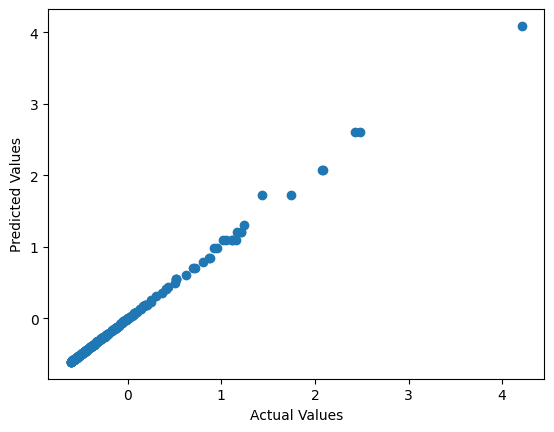

In [ ]:
# Generate predictions for the test set using the trained decision tree regression model
y_pred_dtreg = dtreg.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred_dtreg)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Scatter Plot: Actual vs Predicted Values (Decision Tree Regressor)

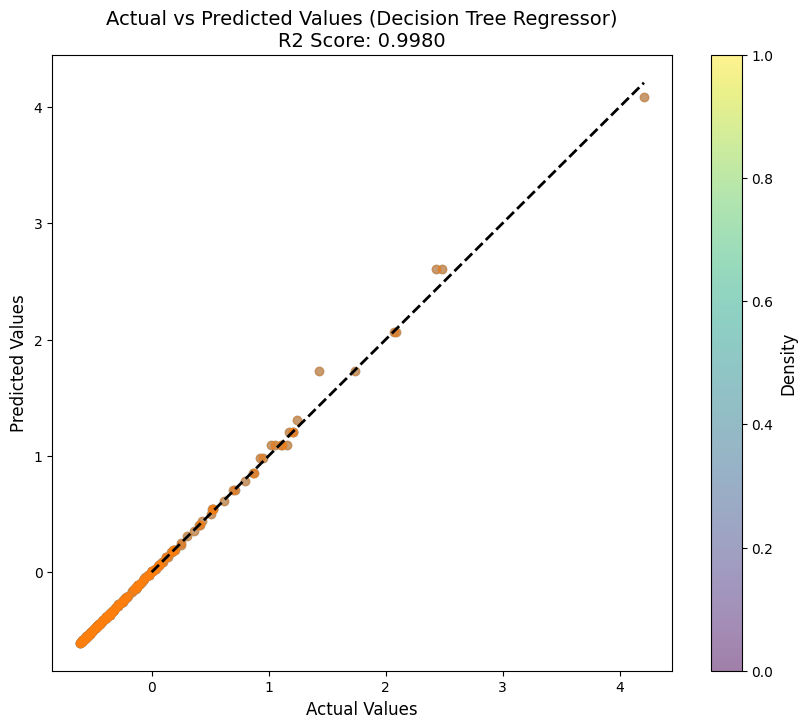

In [ ]:
# Calculate the R-squared value of the model
r2 = r2_score(y_test, y_pred_dtreg)

# Create a scatter plot of predicted values against actual values
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_test, y_pred_dtreg, alpha=0.5)

# Add a diagonal line to the plot for comparison
max_val = max(max(y_test), max(y_pred_dtreg))
ax.plot([0, max_val], [0, max_val], 'k--', lw=2)

# Set the title and axis labels
ax.set_title("Actual vs Predicted Values (Decision Tree Regressor)\nR2 Score: {:.4f}".format(r2), fontsize=14)
ax.set_xlabel("Actual Values", fontsize=12)
ax.set_ylabel("Predicted Values", fontsize=12)

# Add a color bar to show the density of points
cbar = plt.colorbar(ax.scatter(y_test, y_pred_dtreg, alpha=0.5), ax=ax)
cbar.ax.set_ylabel('Density', fontsize=12)

# Show the plot
plt.show()

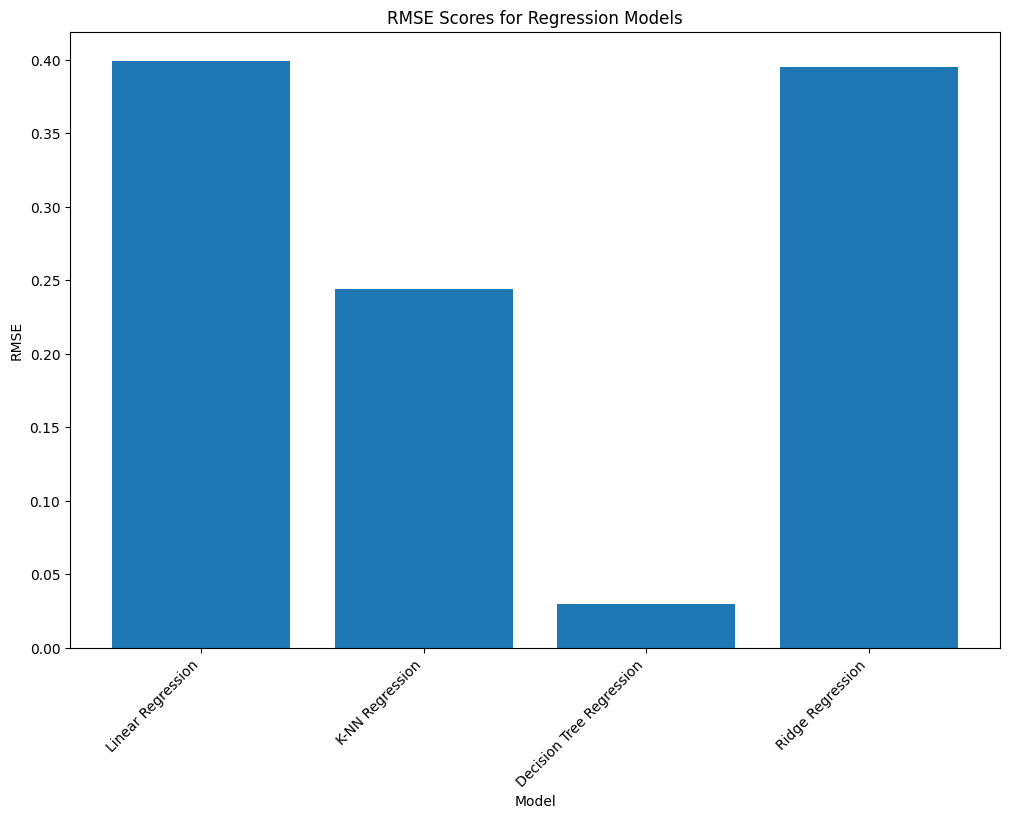

In [ ]:
# Create a bar plot of the RMSE scores
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_linreg)),
               np.sqrt(mean_squared_error(y_test, y_pred_knnreg)),
               np.sqrt(mean_squared_error(y_test, y_pred_dtreg)),
               np.sqrt(mean_squared_error(y_test, y_pred_ridge))
               ]
models = ['Linear Regression', 'K-NN Regression', 'Decision Tree Regression', 'Ridge Regression']

#Increase the figure size
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
# Bar plot with rotated x-axis labels
bars = plt.bar(models, rmse_scores)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")
# Adding labels and title
plt.title('RMSE Scores for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Display the plot
plt.show()